In [30]:
import  pandas as pd 
df = pd.read_csv('input/tips.csv')

# Так как у нас csv загрузился одной колонкой и данные разделены запятыми, то нужно привести его к нормальному виду - по разными колонкам свои данные разложить

# Итак, первое решение будет простым и достаточно коротким.

# Сначала, нам понадобится пандосовская функция
# str.split (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.split.html).
# Она просто разбивает столбец на список на основании разделителя

# Но у функции str.split есть замечательный параметр expand=True,
# позволяющий сразу сделать разбиение на колонки и получить датафрейм

# new_df = df['new_values'].str.split('\n',expand=True)
# new_df

# df['new_values'].str.split('\n')

df.columns = ['column']
df = pd.DataFrame(df.column.str.split(',', expand=True))
df.columns = ['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size']
total_rows = len(df)
display(total_rows)

244

In [31]:
df.count()

total_bill    244
tip           244
sex           244
smoker        244
day           244
time          244
size          244
dtype: int64

In [33]:
df.total_bill.count()

244

In [34]:
df['total_bill']

0      16.99
1      10.34
2      21.01
3      23.68
4      24.59
       ...  
239    29.03
240    27.18
241    22.67
242    17.82
243    18.78
Name: total_bill, Length: 244, dtype: object

In [45]:
df.sort_values('total_bill')

,total_bill,tip,sex,smoker,day,time,size
235,10.07,1.25,"""Male""","""No""","""Sat""","""Dinner""",2
82,10.07,1.83,"""Female""","""No""","""Thur""","""Lunch""",1
226,10.09,2,"""Female""","""Yes""","""Fri""","""Lunch""",2
10,10.27,1.71,"""Male""","""No""","""Sun""","""Dinner""",2
51,10.29,2.6,"""Female""","""No""","""Sun""","""Dinner""",2
...,...,...,...,...,...,...,...
30,9.55,1.45,"""Male""","""No""","""Sat""","""Dinner""",2
178,9.6,4,"""Female""","""Yes""","""Sun""","""Dinner""",2
43,9.68,1.32,"""Male""","""No""","""Sun""","""Dinner""",2
148,9.78,1.73,"""Male""","""No""","""Thur""","""Lunch""",2


In [48]:
df.dtypes

total_bill    object
tip           object
sex           object
smoker        object
day           object
time          object
size          object
dtype: object

In [49]:
df['total_bill'].astype('float')

0      16.99
1      10.34
2      21.01
3      23.68
4      24.59
       ...  
239    29.03
240    27.18
241    22.67
242    17.82
243    18.78
Name: total_bill, Length: 244, dtype: float64

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   total_bill  244 non-null    object
 1   tip         244 non-null    object
 2   sex         244 non-null    object
 3   smoker      244 non-null    object
 4   day         244 non-null    object
 5   time        244 non-null    object
 6   size        244 non-null    object
dtypes: object(7)
memory usage: 13.5+ KB


In [56]:
df['total_bill'].astype('float')

0      16.99
1      10.34
2      21.01
3      23.68
4      24.59
       ...  
239    29.03
240    27.18
241    22.67
242    17.82
243    18.78
Name: total_bill, Length: 244, dtype: float64

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   total_bill  244 non-null    object
 1   tip         244 non-null    object
 2   sex         244 non-null    object
 3   smoker      244 non-null    object
 4   day         244 non-null    object
 5   time        244 non-null    object
 6   size        244 non-null    object
dtypes: object(7)
memory usage: 13.5+ KB


In [60]:
df['total_bill'].astype(float).max()

50.81

In [67]:
df['total_bill'] = df['total_bill'].astype(float)
df['tip'] = df['tip'].astype(float)
df['size'] = df['size'].astype(int)

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int32  
dtypes: float64(2), int32(1), object(4)
memory usage: 12.5+ KB


In [69]:
%matplotlib inline

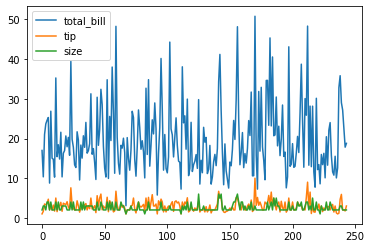

In [70]:
df.plot()

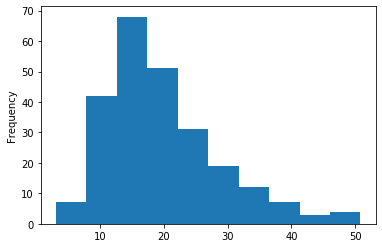

In [71]:
df['total_bill'].plot(kind = 'hist')

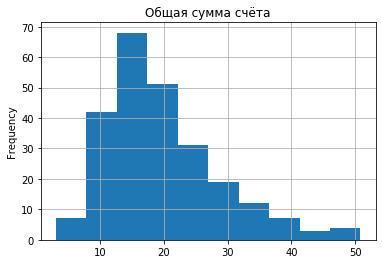

In [72]:
df['total_bill'].plot(kind = 'hist', grid = True, title = 'Общая сумма счёта')

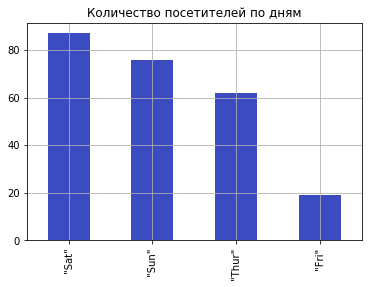

In [73]:
df['day'].value_counts().plot(kind = 'bar', 
                              grid = True, 
                              colormap = 'coolwarm', 
                              title = 'Количество посетителей по дням')

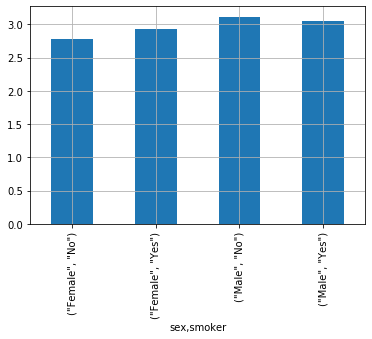

In [75]:
df.groupby(by = ['sex', 'smoker'])['tip'].mean().plot(kind = 'bar', grid= True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000244999A2BC8>,
      dtype=object)

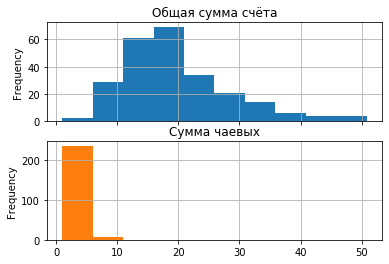

In [77]:
df[['total_bill', 'tip']].plot(kind = 'hist', 
                               grid = True, 
                               subplots = True, 
                               title = ['Общая сумма счёта', 'Сумма чаевых'], 
                               legend = False)

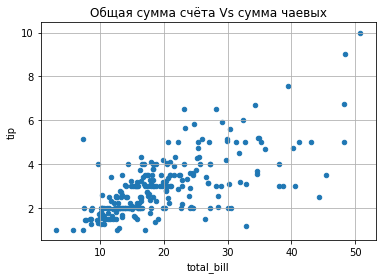

In [78]:
# Есть ли какая-то связь между суммой по счёту и суммой чаевых.
# Для получения такой информации мы можем построить график типа scatter plot:

# На этом графике можно увидеть, что более щедрые чаевые обычно оставляют посетители,
# которые делают более дорогие заказы, а также видны исключения из правила.

df.plot(x = 'total_bill', 
        y = 'tip', 
        kind = 'scatter', 
        grid = True, 
        title = 'Общая сумма счёта Vs сумма чаевых')

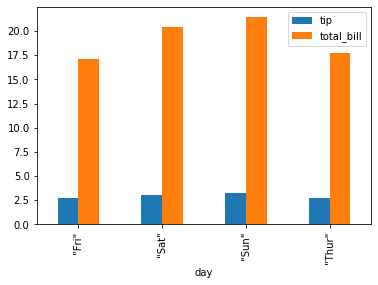

In [79]:
# Если нам нужно совместить на графике несколько качественных и количественных показателей, то датафрейм следует предварительно обработать.
# Например, если мы хотим отобразить средние значения суммы счёта и размера чаевых по дням недели, то потребуется такой код:

df.pivot_table(values = ['total_bill', 'tip'], 
               index = 'day', 
               aggfunc = 'mean').plot(kind = 'bar')

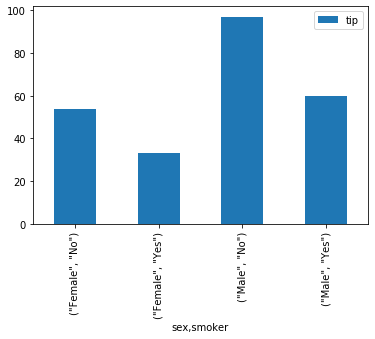

In [80]:
df.pivot_table(values = 'tip', index = ['sex', 'smoker'], aggfunc = 'count').plot(kind = 'bar')

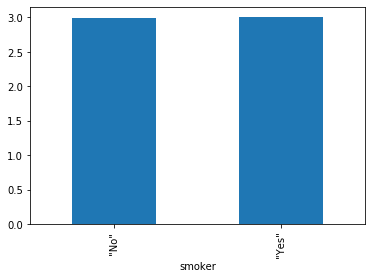

In [81]:
df.groupby('smoker')['tip'].mean().plot(kind = 'bar')

In [82]:
# Matplotlib — это библиотека Python, обладающая широкими возможностями для создания и отображения графической информации. В этом блоке мы рассмотрим основные приёмы работы с этой библиотекой на примере оформления графиков для датасета tips.csv. 

# Импортируйте необходимые библиотеки, включая модуль pyplot библиотеки Matplotlib, который содержит требуемые функции и методы. Для корректного отображения графиков в ноутбуке используйте команду %matplotlib inline. Загрузите файл tips.csv.

# Существует несколько подходов к созданию графиков в Matplotlib. Один из них — объектно-ориентированный подход, он наиболее прозрачный и мощный по функционалу. Процесс работы над графиком начинается с создания объекта, содержащего необходимую информацию и настройки. К этому объекту мы будем добавлять координатную плоскость и другие графические объекты.

# В первой строке кода создаётся объект с именем fig, к которому применяются все настройки. Во второй строке создаётся координатная плоскость (axes), которая начинается в левом нижнем углу без отступов (координаты 0, 0) и занимает отведённое место в области (ширина и высота равны 1):

import matplotlib.pyplot as plt
%matplotlib inline

(array([ 7., 42., 68., 51., 31., 19., 12.,  7.,  3.,  4.]),
 array([ 3.07 ,  7.844, 12.618, 17.392, 22.166, 26.94 , 31.714, 36.488,
        41.262, 46.036, 50.81 ]),
 <a list of 10 Patch objects>)

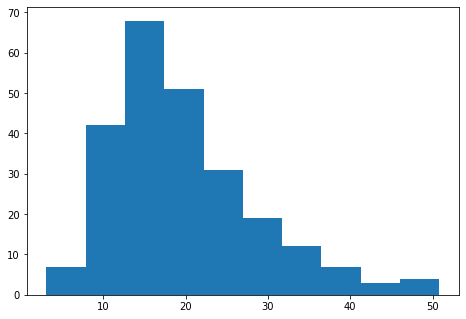

In [83]:
# Например, для построения гистограммы распределения признака «Общая сумма счёта» нам следует применить к axes метод hist:

fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.hist(df['total_bill'])

Text(0.5, 0, 'Сумма заказа, USD')

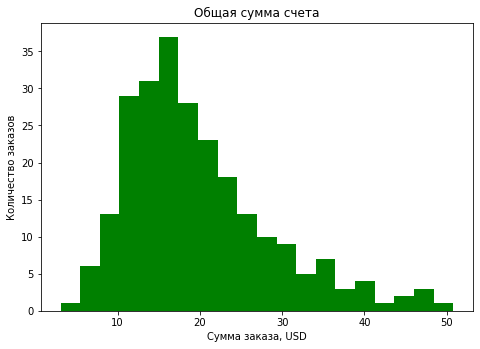

In [84]:
# У метода hist можно менять цвет диаграммы (color) и увеличивать количество столбцов для демонстрации распределения (bins).К графику можно добавить заголовки:

# axes.set_title — заголовок диаграммы;
# axes.set_ylabel — заголовок для оси ординат;
# axes.set_xlabel — заголовок для оси абсцисс.

fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.hist(df['total_bill'], bins = 20, color = 'green')
axes.set_title('Общая сумма счета')
axes.set_ylabel('Количество заказов')
axes.set_xlabel('Сумма заказа, USD')

Text(0, 0.5, 'Размер чаевых')

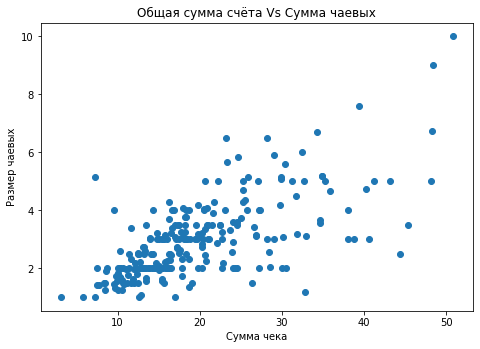

In [85]:
# Для размещения на координатной плоскости графиков других видов необходимо вызывать соответствующие методы применительно к объекту axes. Например, для создания scatter plot, отображающего связь между суммой счёта и размером чаевых, воспользуемся методом scatter:

fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.scatter(x = df['total_bill'], y = df['tip'], marker = 'o')
axes.set_title('Общая сумма счёта Vs Cумма чаевых')
axes.set_xlabel('Сумма чека')
axes.set_ylabel('Размер чаевых')

In [ ]:
# С помощью параметра marker можно настроить форму маркеров, используемых для отображения каждого индивидуального случая. Посмотрите другие варианты форм маркеров.



Text(0, 0.5, 'Размер чаевых')

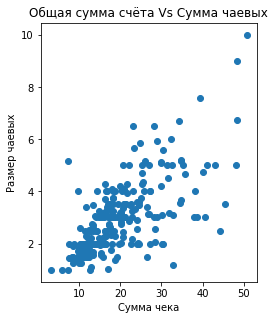

In [88]:
fig = plt.figure()
axes = fig.add_axes([0.2, 0.2, 0.5, 0.9])
axes.scatter(x = df['total_bill'], y = df['tip'], marker = 'o')
axes.set_title('Общая сумма счёта Vs Cумма чаевых')
axes.set_xlabel('Сумма чека')
axes.set_ylabel('Размер чаевых')


Text(0, 0.5, 'Размер чаевых')

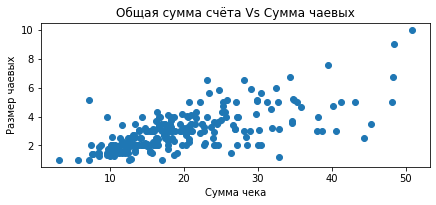

In [89]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 0.9, 0.5])
axes.scatter(x = df['total_bill'], y = df['tip'], marker = 'o')
axes.set_title('Общая сумма счёта Vs Cумма чаевых')
axes.set_xlabel('Сумма чека')
axes.set_ylabel('Размер чаевых')


Text(0, 0.5, 'Размер чаевых')

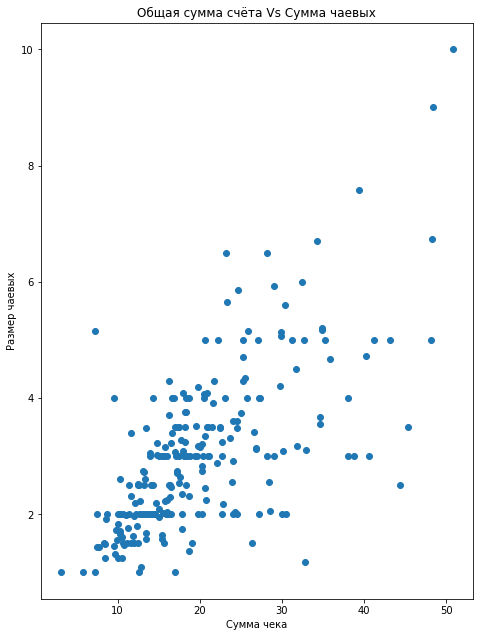

In [90]:
fig = plt.figure()
axes = fig.add_axes([0.1,0.1,1,2])
axes.scatter(x = df['total_bill'], y = df['tip'], marker = 'o')
axes.set_title('Общая сумма счёта Vs Cумма чаевых')
axes.set_xlabel('Сумма чека')
axes.set_ylabel('Размер чаевых')


In [93]:
# Мы можем размещать несколько систем координат на одном объекте, что позволит нам отображать вспомогательную информацию на основном графике. Для добавления второй системы координат необходимо повторно применить к объекту fig метод set_axes, указав новое имя для второй системы координат.

# Первые два числовых параметра, указанные при создании систем координат, — это отступ снизу и слева, а следующие два — ширина и высота относительно ширины и высоты всего пространства (в долях единицы) для построения графика.

<BarContainer object of 4 artists>

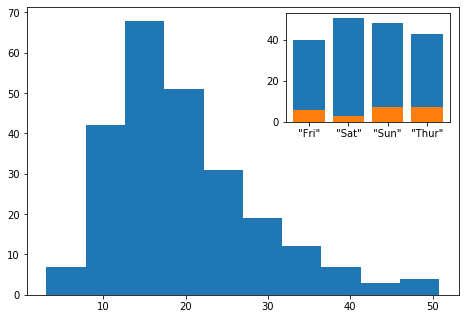

In [95]:
tips_per_day = df.groupby(by = 'day')['total_bill'].agg(['min','max']).reset_index()
fig = plt.figure()
main_axes = fig.add_axes([0, 0, 1, 1])
main_axes.hist(df['total_bill'])
insert_axes = fig.add_axes([0.6, 0.6, 0.38, 0.38])
insert_axes.bar(x = tips_per_day['day'], height = tips_per_day['max'])
insert_axes.bar(x = tips_per_day['day'], height = tips_per_day['min'])

<BarContainer object of 4 artists>

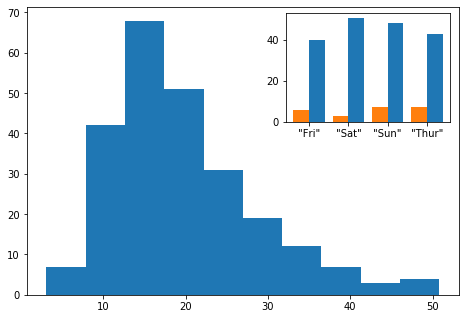

In [96]:
# Параметр align указывает, следует ли размещать столбцы для отображения каждого значения в центре или необходимо сместить их к краю. С помощью параметра width мы задаём ширину столбца в долях единицы относительно ширины всего пространства, выделенного для данного столбца. Отрицательное значение ширины позволит нам сдвинуть столбцы, отображающие данный параметр, в левую сторону:

fig = plt.figure()
main_axes = fig.add_axes([0, 0, 1, 1])
main_axes.hist(df['total_bill'])
insert_axes = fig.add_axes([0.6, 0.6, 0.38, 0.38])
insert_axes.bar(x = tips_per_day['day'], height = tips_per_day['max'], 
                width = 0.4, align = 'edge')
insert_axes.bar(x = tips_per_day['day'], height = tips_per_day['min'], 
                width = -0.4, align = 'edge')

In [ ]:
# Добавление легенды
# Если на графике отображаются данные из нескольких столбцов датафрейма, необходимо сопроводить график дополнительными пояснениями: какой цвет соответствует выводимой информации. Для этого добавим на график легенду при помощи метода legend к объекту axes. Для корректного отображения данных в легенде необходимо добавить параметр label. Место размещения легенды на координатной плоскости задаётся с помощью параметра loc:


        

In [ ]:
# Разместить в одном пространстве несколько графиков можно и с помощью метода subplots. В параметрах фигуры необходимо указать количество строк и столбцов, в которых будут размещаться графики. При желании можно задать размер фигуры в дюймах (ширина*высота):



In [97]:
import numpy as np

In [98]:
x = np.linspace(start=-3., stop=3., num=1000)
y1 = np.exp(x)

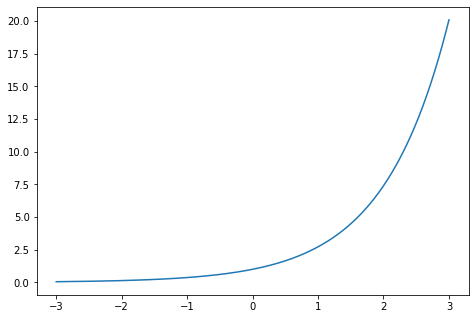

In [99]:
# Отрисовка одной кривой

fig = plt.figure()
axes = fig.add_axes([0,0,1,1])
axes.plot(x, y1) 

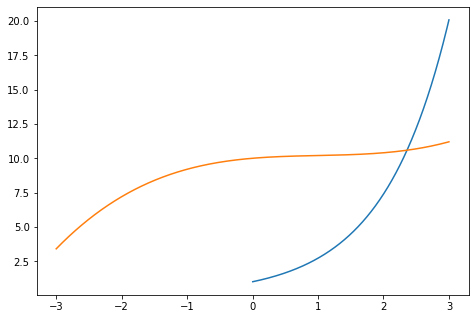

In [100]:
# Отрисовка нескольких кривых

y2 = 10 + 0.4*x - 0.3*x**2 + 0.1*x**3

fig = plt.figure()
axes = fig.add_axes([0,0,1,1])
axes.plot(x[500:], y1[500:]) 
axes.plot(x, y2)

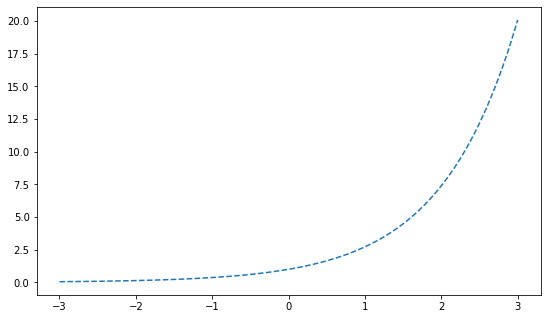

In [101]:
fig = plt.figure(figsize=(7, 4))
axes = fig.add_axes([0,0,1,1])
axes.plot(x, y1, linestyle='--')


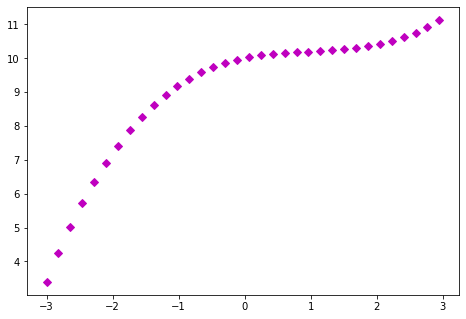

In [102]:
fig = plt.figure()
axes = fig.add_axes([0,0,1,1])
axes.plot(x[::30], y2[::30], 'mD')

In [103]:
x = np.linspace(start=-3., stop=3., num=1000)
y1 = np.exp(x)

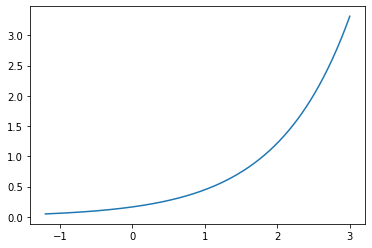

In [107]:
plt.plot(x[300:], y1[:700])

In [108]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [109]:
# Seaborn — графическая библиотека с большими функциональными возможностями, позволяющая создавать разные типы графиков и использовать расширенные настройки при оформлении. Многие функции Seaborn интегрируются с библиотекой Matplotlib, что создает дополнительные возможности для творчества при визуализации данных.


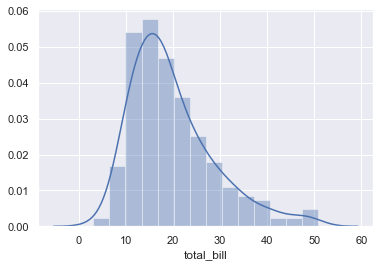

In [113]:
# Для построения гистограммы распределения количественных признаков в библиотеке Seaborn используется метод distplot. Перед применением метода установим стандартные параметры отображения графиков с помощью команды sns.set():

sns.set()
sns.distplot(df['total_bill'])

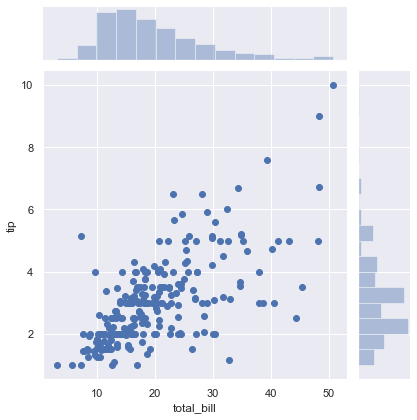

In [114]:
# Seaborn позволяет разместить на одном графике гистограммы распределения двух признаков и показать связь между ними. Тип графика, используемый для этого, называется jointplot:

sns.jointplot(x = 'total_bill', y = 'tip', data = df)

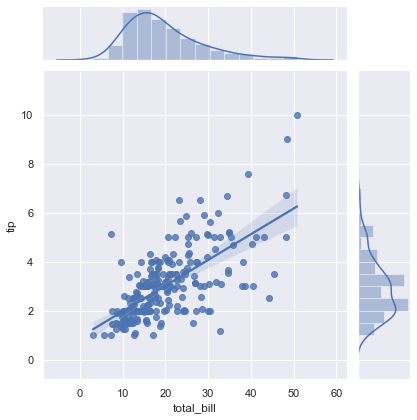

In [115]:
# Характер представления информации в центральной части графика можно регулировать с помощью параметра kind. Например, kind = 'reg' выводит на экран не только точки, представляющие данные об отдельных посещениях ресторана, но и линию регрессии, выражающую общий характер связи между двумя величинами:

sns.jointplot(x = 'total_bill', y = 'tip', data = df, kind = 'reg')

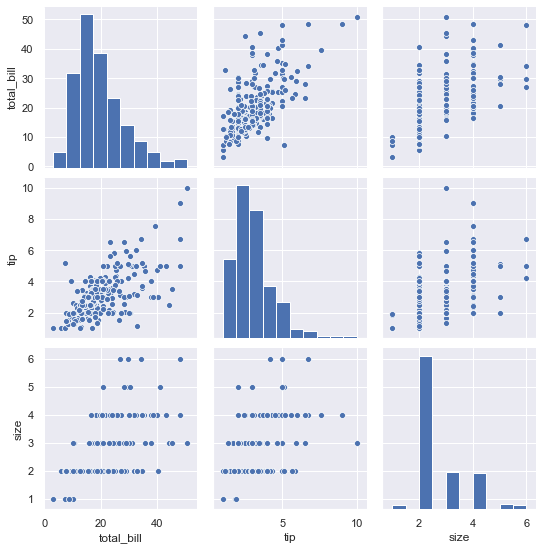

In [116]:
# Другой быстрый и наглядный способ отобразить гистограммы распределения количественных признаков и особенности связей между ними — построить график типа pairplot:

sns.pairplot(df)

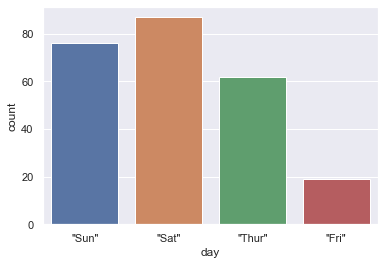

In [118]:
# Работа с категориальными признаками
# Для отображения информации о качественных признаках на диаграммах по методам библиотек Pandas и Matplotlib приходится предварительно обрабатывать датафрейм, группируя нужные данные. В Seaborn такой проблемы нет: при построении графиков можно обращаться к столбцам с категориальными признаками напрямую. Для построения гистограммы распределения категориального признака можно воспользоваться методом countplot:
        
sns.countplot(x = 'day', data = df)

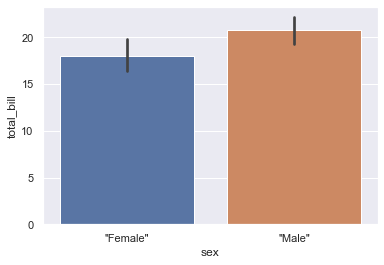

In [119]:
# Категориальные значения при построении графиков можно использовать в качестве одного из параметров метода barplot. Он позволяет разделить датафрейм на группы в зависимости от значения категориальной переменной. По умолчанию для каждой группы вычисляется среднее значение заданной количественной переменной. Вместо среднего значения можно вычислить и любую другую статистическую характеристику, наименование которой задается в параметре estimator.
# График показывает, что средний чек, оплаченный клиентами-мужчинами, немного больше, чем средний чек клиентов женского пола.

sns.barplot(x = 'sex', y = 'total_bill', data = df)

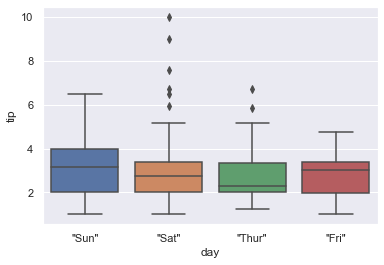

In [120]:
# Boxplots
# Box plot — тип графика, компонентами которого являются:

# Отрезок (Range), отражающий диапазон значений набора данных.
# Прямоугольник (Box), который отображает границы основного объема данных. Левой границей считается значение 25%-ый квантиля, или Q1, первый квартал. Правой границей является 75%-ый квантиль, или Q3, третий квартал.
# Усы (whiskers) — отметки на оси, представляющие левый и правый «крайние» значения данных. Фактически эти значения не всегда являются минимумом или максимумом набора. Они представляют значения, отстоящие на 1.5*IQR влево или вправо от левой (Q1) или правой (Q2) границы соответственно. Здесь IQR - Interquartile Range (межквантильный диапазон) — ширина прямоугольника от Q1 до Q3.
# Выбросы (Outliers) — значения, находящиеся за левым и правым «крайними» значениями на оси.

# Для создания графиков такого типа в Seaborn используется метод boxplot. Он позволяет отобразить распределение заданного количественного признака по категориям, которые определяются значением заданного качественного признака. На диаграмме ниже показывается, как менялась сумма чаевых в зависимости от дня недели:

sns.boxplot(x = 'day', y = 'tip', data = df)

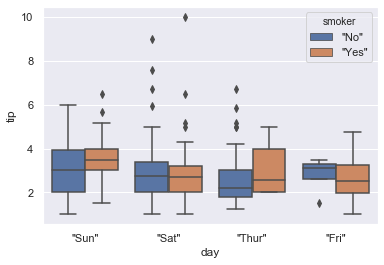

In [121]:
# Ещё один способ увеличения информативности методов Seaborn — использование параметра hue. Он позволяет дополнительно разделять отображаемые данные в зависимости от значения нового категориального признака. Посмотрите, как меняется отображение boxplot при добавлении параметра hue:

sns.boxplot(x = 'day', y = 'tip', data = df, hue = 'smoker')

In [ ]:
# Такой способ представления информации позволяет нам увидеть, как изменялось распределение сумм чаевых в разные дни недели в зонах для курящих и некурящих гостей ресторана.



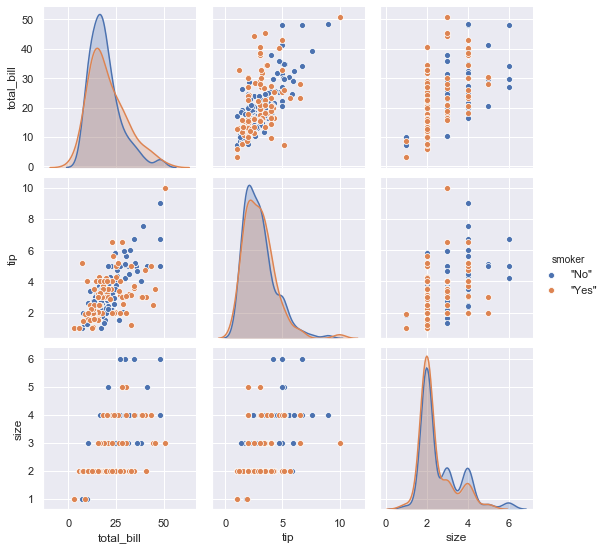

In [123]:
sns.pairplot(df, hue = 'smoker')

In [ ]:
# Графики табличного типа
# Степень связи между двумя величинами в Seaborn помогает оценить корреляционный анализ. Величина степени связи (коэффициент корреляции) может меняться от -1 до +1: чем ближе абсолютное значение коэффициента к единице, тем сильнее связь между признаками.

# Для отображения информации о результатах корреляционного анализа в Seaborn часто используются тепловые карты (heatmap).  Рассмотрим, как создать такую карту. Сначала вычислим коэффициенты корреляции между количественными признаками, содержащимися в датафрейме, с помощью метода corr(). Результат вычислений сохраним в новом датафрейме correlation:

In [124]:
correlation = df.corr()

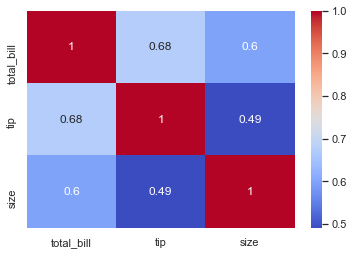

In [125]:
# Теперь мы можем передать созданный датафрейм с коэффициентами в качестве одного из параметров метода heatmap. Для отображения в тепловой карте значений коэффициентов корреляции зададим параметр annot = True. Для использования более ярких цветов при заливке ячеек применяем цветовую палитру coolwarm (параметр cmap):

sns.heatmap(correlation, annot = True, cmap = 'coolwarm')

In [ ]:
# Библиотека Plotly
# Библиотека Plotly является коммерческим продуктом с бесплатной версией. С помощью этой библиотеки можно делать сложные визуализации с элементами управления. Например, отображать 3D диаграмму с выбором опций:


In [ ]:
# Мы дадим общий обзор основных возможностей библиотеки, а при необходимости вы сможете освоить более продвинутые функции под свои рабочие задачи.

# Библиотека Plotly не входит в стандартный набор модулей Anaconda, поэтому ее следует установить. Это можно сделать с помощью менеджера пакетов pip, который запускается из командной строки или напрямую из jupyter notebook. В случае запуска менеджера пакетов из ячейки jupyter notebook перед текстом команды нужно добавить восклицательный знак.

In [126]:
!pip install plotly

  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11435 sha256=b9398a8558a416aee615bcbecb396825343bed59c1c2dd8ff4250732134dfbf0
  Stored in directory: c:\users\vandr\appdata\local\pip\cache\wheels\f9\8d\8d\f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying


In [127]:
# Для эффективного взаимодействия Plotly с датафреймами Pandas нам понадобится библиотека Cufflinks. Установите её командой:

In [128]:
!pip install cufflinks

  Created wheel for cufflinks: filename=cufflinks-0.17.3-py3-none-any.whl size=68729 sha256=40641ab05cdb615ebe0c72af4a1912fc89eecb8430c6660ecbdf8bd3d1c0c54f
  Stored in directory: c:\users\vandr\appdata\local\pip\cache\wheels\e1\27\13\3fe67fa7ea7be444b831d117220b3b586b872c9acd4df480d0
Successfully built cufflinks


In [129]:
# Перед созданием интерактивных визуализаций импортируйте необходимые библиотеки:

In [130]:
import pandas as pd
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
%matplotlib inline

In [131]:
# Для работы с библиотекой Plotly в режиме оффлайн включите этот режим:

In [132]:
init_notebook_mode(connected = True)
cf.go_offline()

In [133]:
# Для создания разных типов графиков в Pandas используется метод plot с различными настройками:

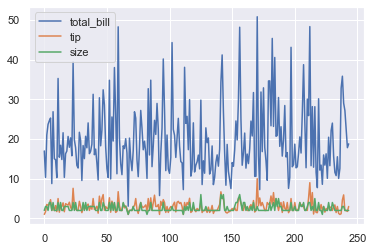

In [134]:
df.plot()

In [135]:
# Для превращения графика в интерактивную визуализацию достаточно добавить в код всего одну букву:

In [136]:
df.iplot()

In [137]:
# Функции графика, созданного методом iplot:

# получение в интерактивном режиме значения признака в отдельных точках;
# регулирование отображения конкретных признаков (отключение и включение данных признаков без изменения кода);
# увеличение фрагмента графика;
# сохранение полученного графика в формате png напрямую из jupyter notebook.

# Как и при работе с методом plot в библиотеке Pandas, при изменении параметров метода iplot можно изменять тип и другие особенности диаграммы. Plotly позволяет создавать новые виды графиков. Например, этот тип графика позволяет не только показать на одной координатной плоскости сумму чека и размер чаевых для каждого заказа, но и демонстрирует, как изменяется разность между этими двумя суммами для разных заказов:

In [138]:
df[['total_bill', 'tip']].iplot(kind = 'spread')

C:\Users\vandr\anaconda3\lib\site-packages\cufflinks\plotlytools.py:850: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead



In [139]:
# Bubblechart — разновидность диаграммы рассеяния (scatterplot), в которой используются три параметра. Третий параметр влияет на размер маркера, который показывает связь между значениями переменных, отложенных на оси абсцисс и оси ординат:

df.iplot(kind = 'bubble', x = 'total_bill', y = 'size', size = 'tip')

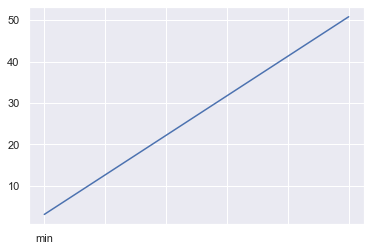

In [141]:
df['total_bill'].agg(['min','max']).plot()

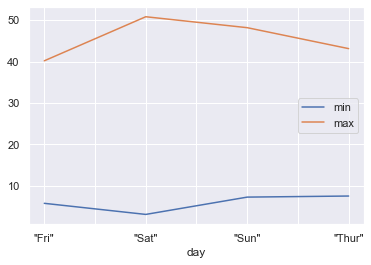

In [142]:
df.groupby(by = 'day')['total_bill'].agg(['min','max']).plot()